<a href="https://colab.research.google.com/github/erick-huang15/Python_Exercises/blob/main/Logistic_RandomF_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your task is to:

1) Use a logistic regression model and try both l1 and l2 regularization. This is a great opportunity to see how tuning hyperparameters can affect the model results. 

2) After doing that, try using KNN and Random Forest models. 

3) Address these questions in a text cell at the end of your code:

Which model performed the best? 
Which hyperparameters did you tune for each of the models? Is there a model that you liked the best and why?


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
from sklearn import set_config
set_config(display='diagram')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#Importing the KNN Classifier and RandomForest Classifier

In [15]:
path = '/content/drive/MyDrive/CD:Week7: Classification/Wine_cultivars.csv'
data = pd.read_csv(path)
data.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [17]:
data.duplicated().sum()

0

In [18]:
data.isna().sum()

Class label                     0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavonid phenols             0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [19]:
X = data.drop(columns='Class label')
y = data['Class label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
logreg = LogisticRegression()

scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)

logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

1.0
0.9777777777777777


L1 Tuning: 

{0.001: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

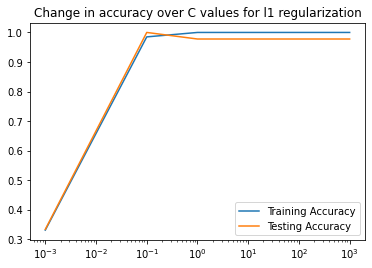

In [28]:
c_values = [0.001, 0.001, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values: 
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

L2 Tuning

{0.0001: 0.9111111111111111,
 0.001: 0.9333333333333333,
 0.01: 0.9555555555555556,
 0.1: 0.9777777777777777,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

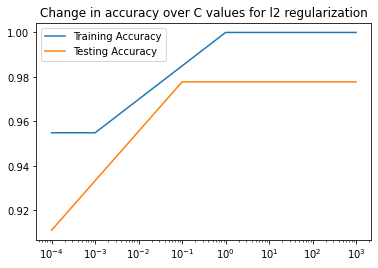

In [29]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

KNN Model

In [35]:
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(scaler, knn)

knn_pipe.fit(X_train, y_train)
print(knn_pipe.score(X_train, y_train))
print(knn_pipe.score(X_test, y_test))

0.9774436090225563
0.9555555555555556


In [37]:
knn_pipe.get_params()

{'kneighborsclassifier': KNeighborsClassifier(),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform',
 'memory': None,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False}

In [38]:
knn_params = {'kneighborsclassifier__n_neighbors': range(1,5),
          'kneighborsclassifier__weights': ['uniform','distance'],
          'kneighborsclassifier__p': [2,3,4]}

In [40]:
knn_grid = GridSearchCV(knn_pipe, knn_params)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 5),
                         'kneighborsclassifier__p': [2, 3, 4],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [42]:
knn_grid.best_params_

{'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__p': 3,
 'kneighborsclassifier__weights': 'uniform'}

In [43]:
best_knn = knn_grid.best_estimator_

In [50]:
best_train_preds = best_knn.predict(X_train) 
best_test_preds = best_knn.predict(X_test)
print('train accuracy:', accuracy_score(y_train, best_train_preds))
print('\n')
print('test accuracy:', accuracy_score(y_test, best_test_preds))

train accuracy: 1.0


test accuracy: 0.9555555555555556


RandomForest Model

In [36]:
rf = RandomForestClassifier()

rf_pipe = make_pipeline(scaler, rf)

rf_pipe.fit(X_train, y_train)
print(rf_pipe.score(X_train, y_train))
print(rf_pipe.score(X_test, y_test))

1.0
1.0


In [51]:
rf_pipe.get_params()

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__random_state': None,
 'randomforestclassifier__verbose': 0,
 'randomforestclassifier__warm_start': False,
 'standardscaler': StandardScaler(),
 'standardscaler__copy': True,
 'standardscaler__wi

In [52]:
# setting parameters by listing ranges
rf_params = {'randomforestclassifier__n_estimators': [100,300],
          'randomforestclassifier__max_depth': [5,10],
          'randomforestclassifier__min_samples_split': [2,10],
          'randomforestclassifier__min_samples_leaf': [2,10]
          }

In [53]:
rf_grid = GridSearchCV(rf_pipe, rf_params)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [5, 10],
                         'randomforestclassifier__min_samples_leaf': [2, 10],
                         'randomforestclassifier__min_samples_split': [2, 10],
                         'randomforestclassifier__n_estimators': [100, 300]})

In [54]:
rf_grid.best_params_ # this is to get the best parameters

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__n_estimators': 100}

In [55]:
best_rf = rf_grid.best_estimator_

In [56]:
best_rf_train_preds = best_rf.predict(X_train) 
best_rf_test_preds = best_rf.predict(X_test)
print('Best train accuracy:', accuracy_score(y_train, best_rf_train_preds))
print('\n')
print('Best test accuracy:', accuracy_score(y_test, best_rf_test_preds))

Best train accuracy: 1.0


Best test accuracy: 1.0


3) Address these questions in a text cell at the end of your code:

Which model performed the best? Based on the score Random Forest Classifier is the best

Which hyperparameters did you tune for each of the models? Is there a model that you liked the best and why? For Logistic I turned the T1 and T2, for KNN I tuned the hyperparameter of n_neighbors, weights, p. For Random Forest I tuned the hyperparameter of max_detph, min_samples_leaf, min_samples_split, n_estimators. Out of all the. models, I like the RandomForest because it scored the highgest in train and test accuracy